# DECISION TREE

# Importing necessary libraries and Loading the Dataset

Data Preparation:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#load the dataset
data = pd.read_excel('heart_disease.xlsx' , sheet_name='Heart_disease')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# Exploratory Data Analysis (EDA):

In [3]:
#Check the datatypes and null values
print(data.dtypes)
print(data.isnull().sum())

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [4]:
# filling missing values in 'oldpeak'
data['oldpeak'].fillna(data['oldpeak'].mean() , inplace=True)

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [6]:
#convert bool to integer
data['fbs'] = data['fbs'].astype(int)

In [7]:
#convert all object columns to strings to avoid mixed types
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype(str)

# Feature Engineering:

In [8]:
#Encode categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [9]:
#Rename 'num' to 'target' for clarity
data.rename(columns={'num':'target'}, inplace =True)

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [11]:
#split the dataset into fatures (X) and Target (Y)
X=data.drop(columns=['target']) #features
Y = data['target'] #Target

In [12]:
#print the shapes of X and Y to verify the split
print("\nFeatures (X) shape" , X.shape)
print("\nTarget (Y) shape" , Y.shape)


Features (X) shape (908, 12)

Target (Y) shape (908,)


# Decision Tree Classification:

In [13]:
#split the dataset into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3 , random_state=42)

In [14]:
#print the shapes of the split dataset to verify
print("\nTraining features (X_train) shape:", X_train.shape)
print("\nTraining features (X_test) shape:", X_test.shape)
print("\nTraining target (Y_train) shape:", Y_train.shape)
print("\nTraining target (Y_test) shape:", Y_test.shape)


Training features (X_train) shape: (635, 12)

Training features (X_test) shape: (273, 12)

Training target (Y_train) shape: (635,)

Training target (Y_test) shape: (273,)


In [15]:
# Train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

# Model Evaluation and Analysis:

In [16]:
#Evaluate the model
Y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

In [17]:
print(f"\nAccuracy:{accuracy:.2f}")


Accuracy:0.50


In [18]:
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       122
           1       0.44      0.45      0.45        82
           2       0.29      0.24      0.26        34
           3       0.22      0.29      0.25        28
           4       0.00      0.00      0.00         7

    accuracy                           0.50       273
   macro avg       0.33      0.33      0.33       273
weighted avg       0.51      0.50      0.50       273



In [19]:
print("\nCConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


CConfusion Matrix:
 [[84 23  5  8  2]
 [24 37 11  8  2]
 [ 6  8  8 11  1]
 [ 4 13  2  8  1]
 [ 1  3  2  1  0]]


In [20]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth =None, ccp_alpha = 0.03)
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy')

In [21]:
path = model.cost_complexity_pruning_path(X_train,Y_train)

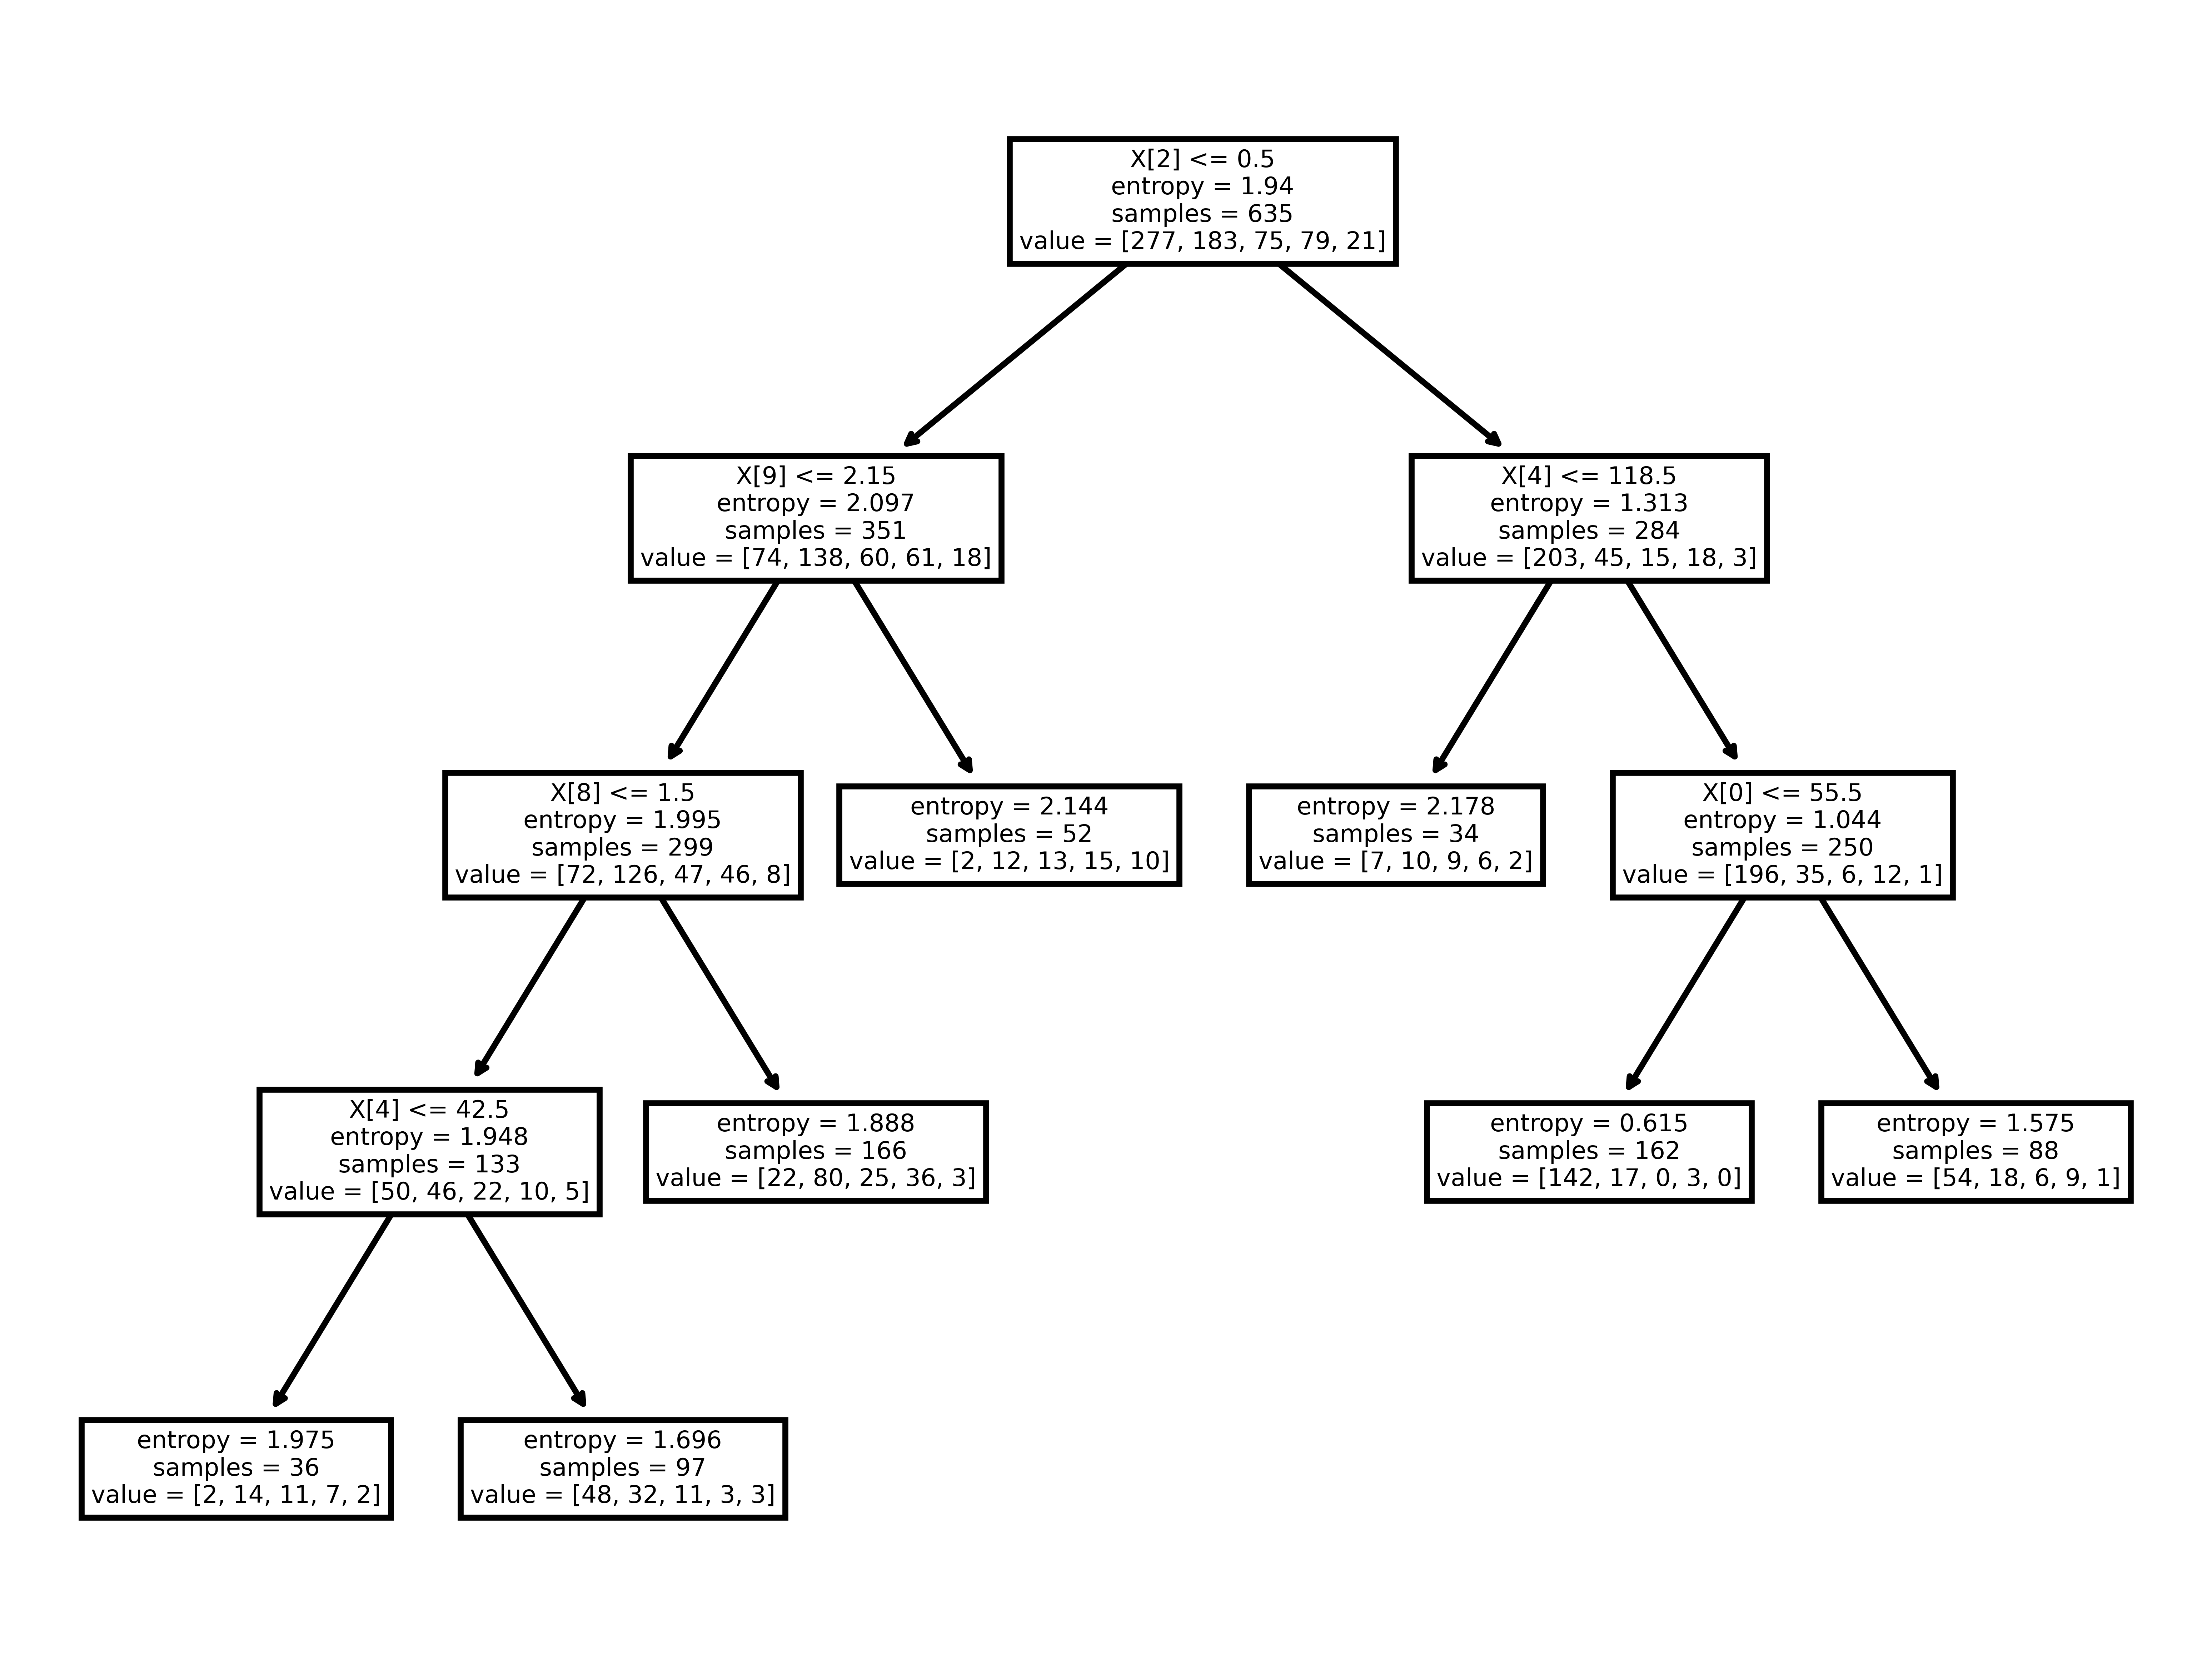

In [22]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

In [23]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,1,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,1,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,1,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,3,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,3,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,3,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,2,0.891253,0,0,4


In [24]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set  
preds

array([1, 1, 0, 3, 1, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 1, 0, 1, 0, 1, 0, 3,
       1, 1, 0, 3, 3, 0, 0, 0, 0, 1, 0, 3, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 3, 1, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 3, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 3], dtype=int64)

In [25]:
pd.Series(preds).value_counts() # getting the count of each category

0    148
1    104
3     21
dtype: int64

In [26]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       122
           1       0.44      0.56      0.49        82
           2       0.00      0.00      0.00        34
           3       0.24      0.18      0.20        28
           4       0.00      0.00      0.00         7

    accuracy                           0.56       273
   macro avg       0.28      0.32      0.29       273
weighted avg       0.47      0.56      0.51       273



C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Prediction on train data

pred_train = model.predict(X_train)
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       277
           1       0.44      0.57      0.50       183
           2       0.00      0.00      0.00        75
           3       0.29      0.19      0.23        79
           4       0.00      0.00      0.00        21

    accuracy                           0.57       635
   macro avg       0.29      0.33      0.30       635
weighted avg       0.47      0.57      0.51       635



C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Interview Questions in word file.